In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [5]:
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [15]:
standardized_data = scaler.transform(X)

In [16]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [18]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [21]:
classifier = svm.SVC(kernel='linear')

In [22]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [23]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [24]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [25]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [5]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

NameError: name 'np' is not defined

Outcome
0    500
1    268
Name: count, dtype: int64
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137        

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


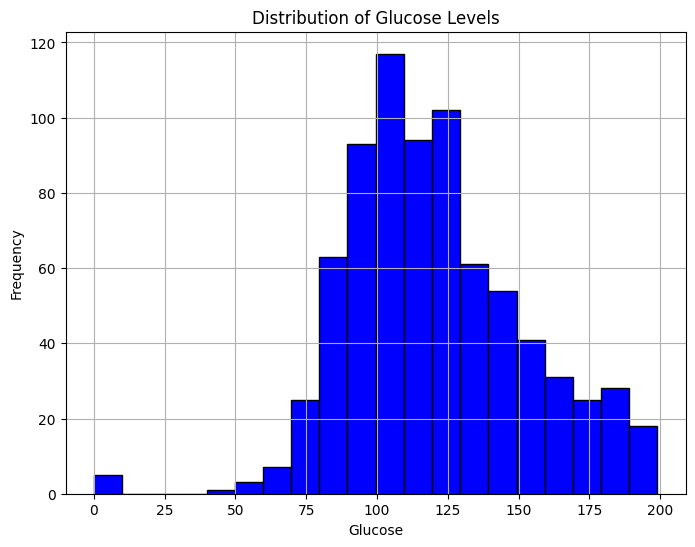

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Importing matplotlib

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Display the distribution of the Outcome attribute
print(diabetes_dataset['Outcome'].value_counts())

# Group by Outcome and calculate the mean
print(diabetes_dataset.groupby('Outcome').mean())

# Separate the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

# Train the SVM model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Predict on training data and calculate accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# Predict on test data and calculate accuracy
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

# Predict for a new input
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Plotting a histogram for the 'Glucose' feature
plt.figure(figsize=(8, 6))
plt.hist(diabetes_dataset['Glucose'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


[1]
[[0.40477429 0.59522571]]
The person is diabetic


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


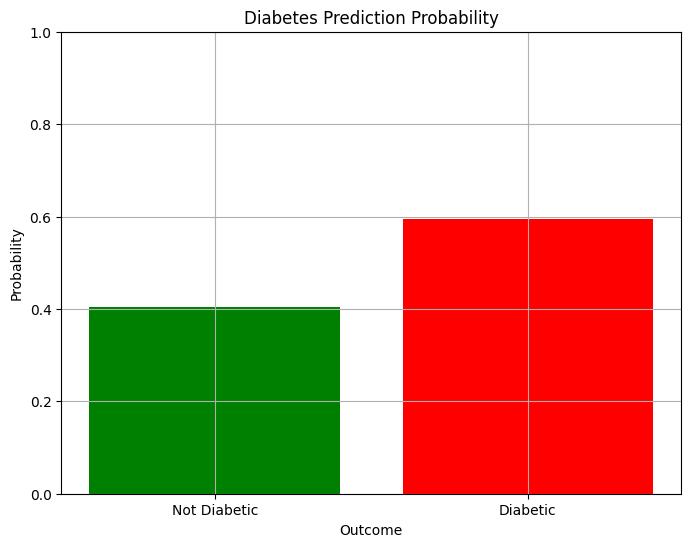

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separate the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM model
classifier = svm.SVC(kernel='linear', probability=True)  # Enable probability estimation
classifier.fit(X_train, Y_train)

# Predict for a new input
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)

# Make the prediction and get probability estimates
prediction = classifier.predict(std_data)
prediction_probabilities = classifier.predict_proba(std_data)  # Get probabilities for both classes

print(prediction)
print(prediction_probabilities)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Plotting the prediction probabilities
plt.figure(figsize=(8, 6))
categories = ['Not Diabetic', 'Diabetic']
plt.bar(categories, prediction_probabilities[0], color=['green', 'red'])
plt.title('Diabetes Prediction Probability')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Predicted Diabetic Population: 206 (26.82%)
Predicted Non-Diabetic Population: 562 (73.18%)


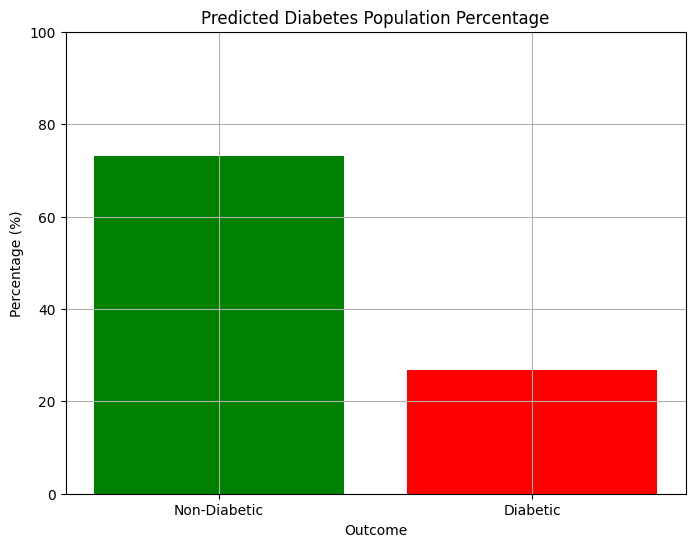

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separate the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM model
classifier = svm.SVC(kernel='linear', probability=True)  # Enable probability estimation
classifier.fit(X_train, Y_train)

# Predict the outcomes for the entire dataset
population_prediction = classifier.predict(X)

# Calculate the percentage of the population predicted to be diabetic
total_population = len(population_prediction)
diabetic_count = np.sum(population_prediction)
non_diabetic_count = total_population - diabetic_count
diabetic_percentage = (diabetic_count / total_population) * 100
non_diabetic_percentage = (non_diabetic_count / total_population) * 100

print(f'Predicted Diabetic Population: {diabetic_count} ({diabetic_percentage:.2f}%)')
print(f'Predicted Non-Diabetic Population: {non_diabetic_count} ({non_diabetic_percentage:.2f}%)')

# Plotting the population percentage prediction
plt.figure(figsize=(8, 6))
categories = ['Non-Diabetic', 'Diabetic']
population_percentages = [non_diabetic_percentage, diabetic_percentage]
plt.bar(categories, population_percentages, color=['green', 'red'])
plt.title('Predicted Diabetes Population Percentage')
plt.xlabel('Outcome')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


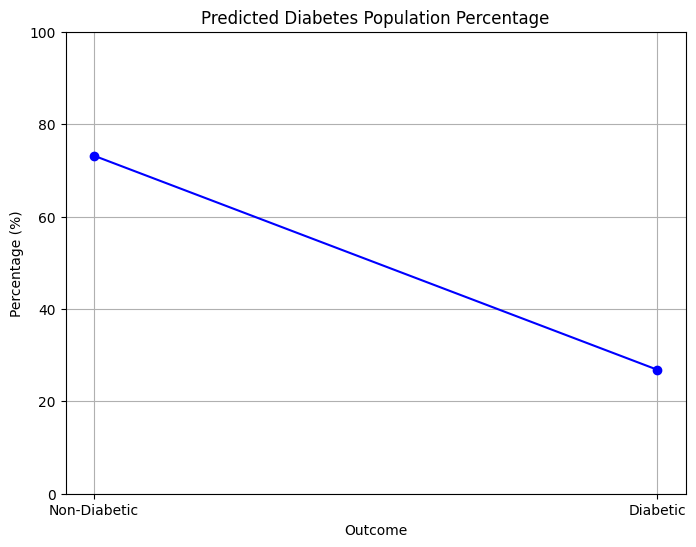

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separate the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM model
classifier = svm.SVC(kernel='linear', probability=True)  # Enable probability estimation
classifier.fit(X_train, Y_train)

# Predict the outcomes for the entire dataset
population_prediction = classifier.predict(X)

# Calculate the percentage of the population predicted to be diabetic
total_population = len(population_prediction)
diabetic_count = np.sum(population_prediction)
non_diabetic_count = total_population - diabetic_count
diabetic_percentage = (diabetic_count / total_population) * 100
non_diabetic_percentage = (non_diabetic_count / total_population) * 100

# Plotting the population percentage prediction as a line plot
plt.figure(figsize=(8, 6))
categories = ['Non-Diabetic', 'Diabetic']
population_percentages = [non_diabetic_percentage, diabetic_percentage]
plt.plot(categories, population_percentages, marker='o', color='blue')  # Line plot with markers
plt.title('Predicted Diabetes Population Percentage')
plt.xlabel('Outcome')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


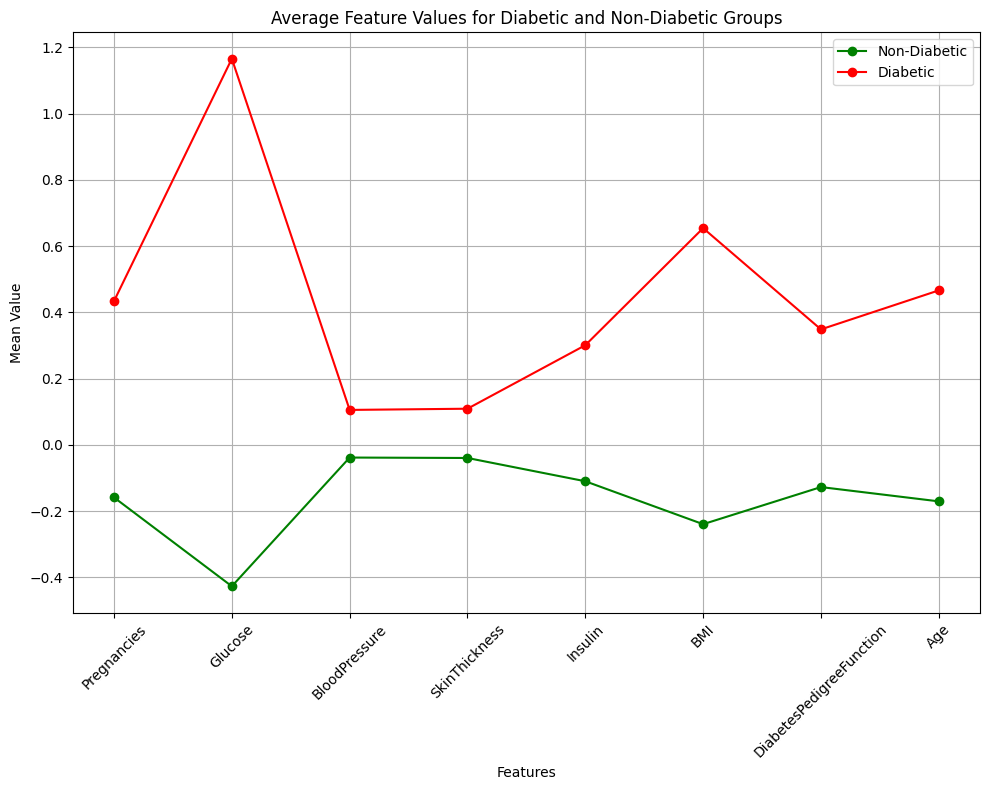

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separate the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM model
classifier = svm.SVC(kernel='linear', probability=True)  # Enable probability estimation
classifier.fit(X_train, Y_train)

# Predict the outcomes for the entire dataset
population_prediction = classifier.predict(X)

# Combine predictions with the original features
predicted_data = pd.DataFrame(X, columns=diabetes_dataset.columns[:-1])
predicted_data['Outcome'] = population_prediction

# Calculate the mean of each feature for diabetic and non-diabetic groups
diabetic_means = predicted_data[predicted_data['Outcome'] == 1].mean()
non_diabetic_means = predicted_data[predicted_data['Outcome'] == 0].mean()

# Plotting the means of each feature
features = diabetes_dataset.columns[:-1]  # Exclude 'Outcome'
plt.figure(figsize=(10, 8))
plt.plot(features, non_diabetic_means[:-1], marker='o', label='Non-Diabetic', color='green')
plt.plot(features, diabetic_means[:-1], marker='o', label='Diabetic', color='red')
plt.title('Average Feature Values for Diabetic and Non-Diabetic Groups')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


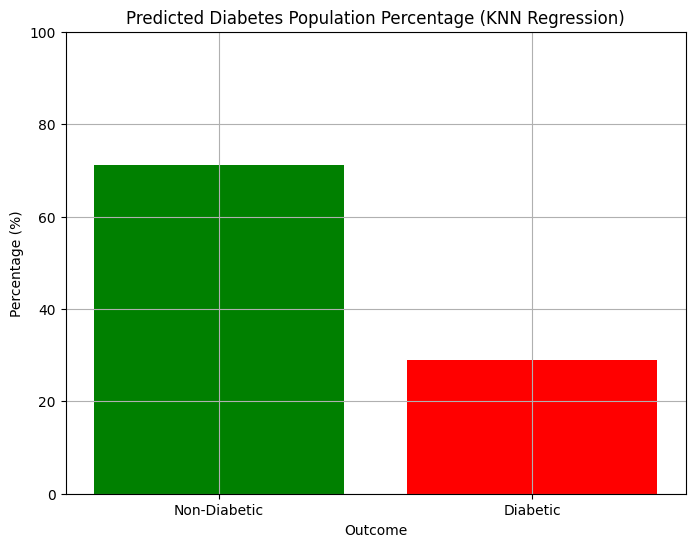

First 10 Continuous Predictions: [0.8 0.  0.6 0.  0.4 0.2 0.2 0.4 0.6 0.4]
First 10 Binary Predictions: [1 0 1 0 0 0 0 0 1 0]


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separate the features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)

# Predict for the entire dataset
predictions_continuous = knn_regressor.predict(X)

# Convert the continuous predictions to binary outcomes (threshold = 0.5)
binary_predictions = (predictions_continuous >= 0.5).astype(int)

# Calculate the percentage of population predicted to be diabetic and non-diabetic
total_population = len(binary_predictions)
diabetic_count = np.sum(binary_predictions)
non_diabetic_count = total_population - diabetic_count
diabetic_percentage = (diabetic_count / total_population) * 100
non_diabetic_percentage = (non_diabetic_count / total_population) * 100

# Plotting the percentage of diabetic and non-diabetic populations
plt.figure(figsize=(8, 6))
categories = ['Non-Diabetic', 'Diabetic']
population_percentages = [non_diabetic_percentage, diabetic_percentage]
plt.bar(categories, population_percentages, color=['green', 'red'])
plt.title('Predicted Diabetes Population Percentage (KNN Regression)')
plt.xlabel('Outcome')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Output the continuous and binary predictions for the first few instances as an example
print('First 10 Continuous Predictions:', predictions_continuous[:10])
print('First 10 Binary Predictions:', binary_predictions[:10])


Accuracy score of the training data:  0.7866449511400652
Accuracy score of the test data:  0.7727272727272727


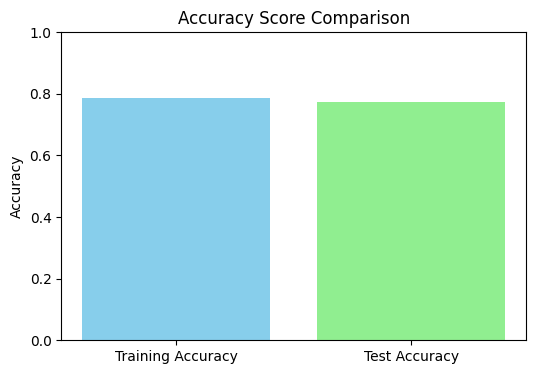

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separating data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Training accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Test accuracy
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Print accuracy scores
print('Accuracy score of the training data: ', training_data_accuracy)
print('Accuracy score of the test data: ', test_data_accuracy)

# Visualize accuracy scores
accuracy_scores = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.title('Accuracy Score Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Sample input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to a DataFrame with the same column names
input_data_as_dataframe = pd.DataFrame([input_data], columns=X.columns)

# Standardize the input data
std_data = scaler.transform(input_data_as_dataframe)
print('Standardized input data: ', std_data)

# Predict on the input data
prediction = classifier.predict(std_data)
print('Prediction: ', prediction)

# Output based on prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')



Accuracy score of the training data:  0.7866449511400652
Accuracy score of the test data:  0.7727272727272727


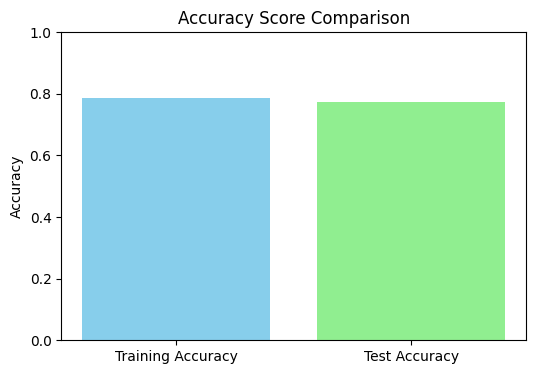

Standardized input data:  [[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
Prediction:  [1]
The person is diabetic


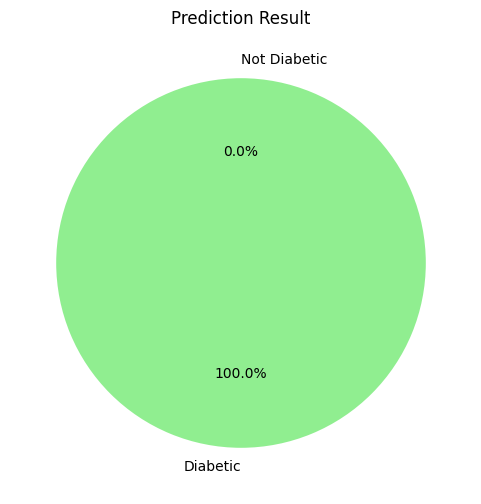

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separating data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Training accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Test accuracy
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Print accuracy scores
print('Accuracy score of the training data: ', training_data_accuracy)
print('Accuracy score of the test data: ', test_data_accuracy)

# Visualize accuracy scores
accuracy_scores = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.title('Accuracy Score Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Sample input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to a DataFrame with the same column names
input_data_as_dataframe = pd.DataFrame([input_data], columns=diabetes_dataset.drop(columns='Outcome').columns)

# Standardize the input data
std_data = scaler.transform(input_data_as_dataframe)
print('Standardized input data: ', std_data)

# Predict on the input data
prediction = classifier.predict(std_data)
print('Prediction: ', prediction)

# Output based on prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Pie chart of the prediction result
labels = ['Not Diabetic', 'Diabetic']
prediction_counts = [1 if prediction[0] == 0 else 0, 1 if prediction[0] == 1 else 0]

plt.figure(figsize=(6, 6))
plt.pie(prediction_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Prediction Result')
plt.show()


Accuracy score of the training data:  0.7866449511400652
Accuracy score of the test data:  0.7727272727272727


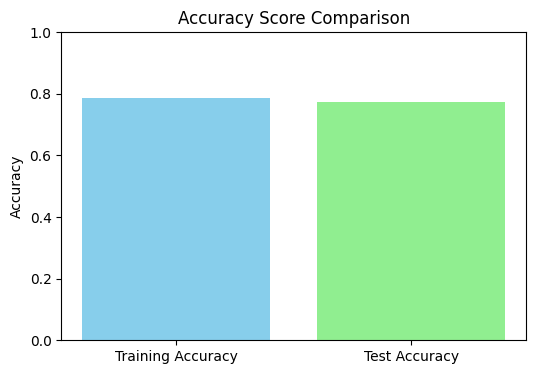

Standardized input data:  [[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
Prediction:  [1]
The person is diabetic


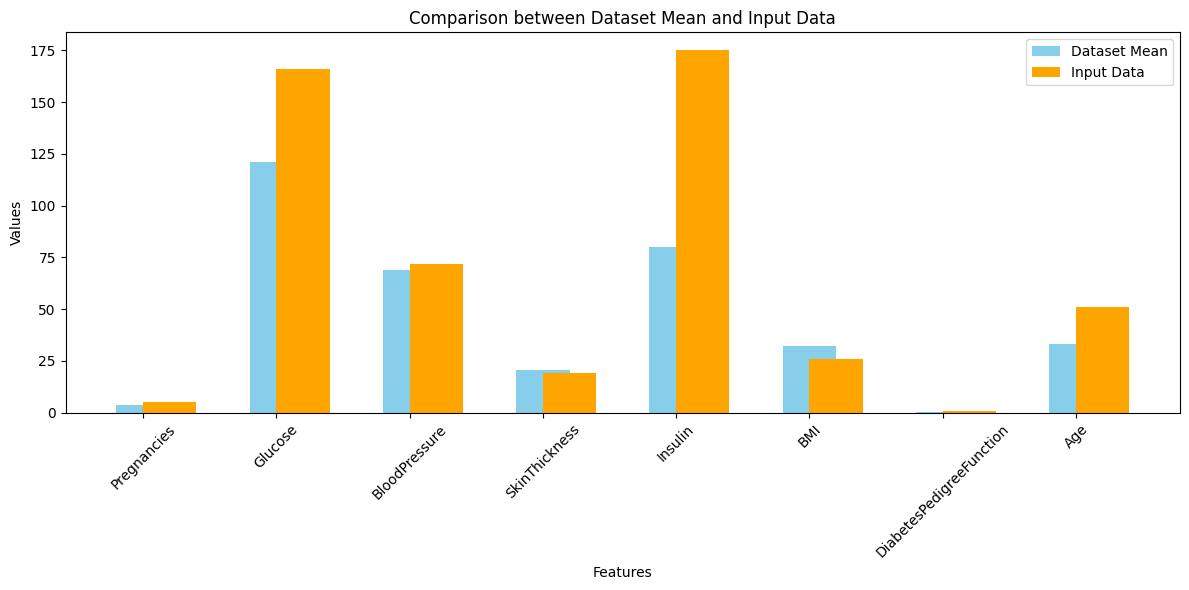

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separating data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Training accuracy
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Test accuracy
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Print accuracy scores
print('Accuracy score of the training data: ', training_data_accuracy)
print('Accuracy score of the test data: ', test_data_accuracy)

# Visualize accuracy scores
accuracy_scores = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.title('Accuracy Score Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Sample input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to a DataFrame with the same column names
input_data_as_dataframe = pd.DataFrame([input_data], columns=diabetes_dataset.drop(columns='Outcome').columns)

# Standardize the input data
std_data = scaler.transform(input_data_as_dataframe)
print('Standardized input data: ', std_data)

# Predict on the input data
prediction = classifier.predict(std_data)
print('Prediction: ', prediction)

# Output based on prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Visualize comparison between dataset mean and input data
dataset_mean = diabetes_dataset.drop(columns='Outcome').mean()

plt.figure(figsize=(12, 6))
plt.bar(dataset_mean.index, dataset_mean, width=0.4, label='Dataset Mean', align='center', color='skyblue')
plt.bar(input_data_as_dataframe.columns, input_data_as_dataframe.iloc[0], width=0.4, label='Input Data', align='edge', color='orange')

plt.xticks(rotation=45)
plt.title('Comparison between Dataset Mean and Input Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


Accuracy score of the test data:  0.7727272727272727


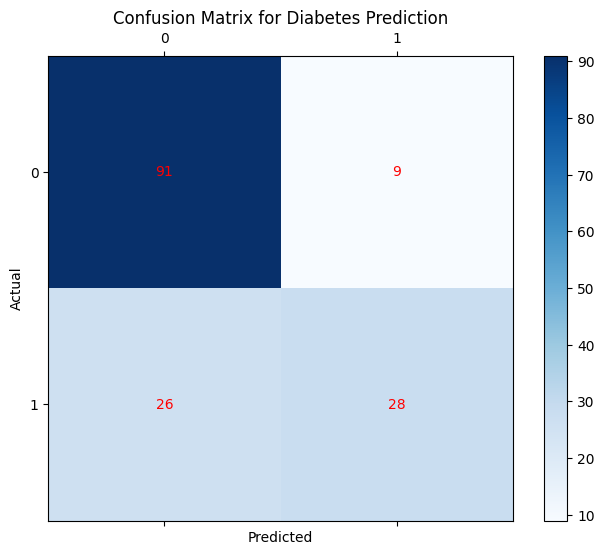

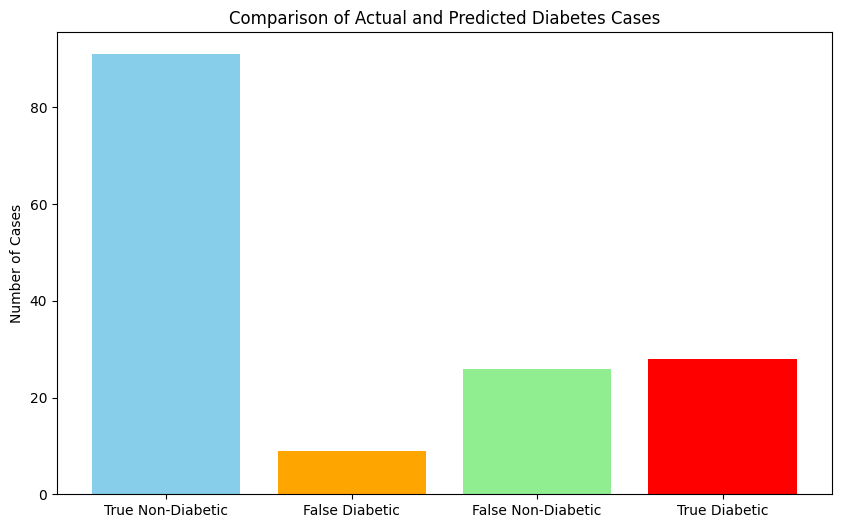

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separating data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Predictions
X_test_prediction = classifier.predict(X_test)

# Calculate accuracy
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data: ', test_data_accuracy)

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix for Diabetes Prediction')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Annotating the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.show()

# Calculate differences between actual and predicted values
difference = Y_test.values - X_test_prediction

# Count the differences
true_non_diabetic = sum((Y_test == 0) & (X_test_prediction == 0))
false_diabetic = sum((Y_test == 0) & (X_test_prediction == 1))
false_non_diabetic = sum((Y_test == 1) & (X_test_prediction == 0))
true_diabetic = sum((Y_test == 1) & (X_test_prediction == 1))

# Plot the differences in a bar chart
labels = ['True Non-Diabetic', 'False Diabetic', 'False Non-Diabetic', 'True Diabetic']
values = [true_non_diabetic, false_diabetic, false_non_diabetic, true_diabetic]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title('Comparison of Actual and Predicted Diabetes Cases')
plt.ylabel('Number of Cases')
plt.show()


Accuracy score of the test data:  0.7727272727272727


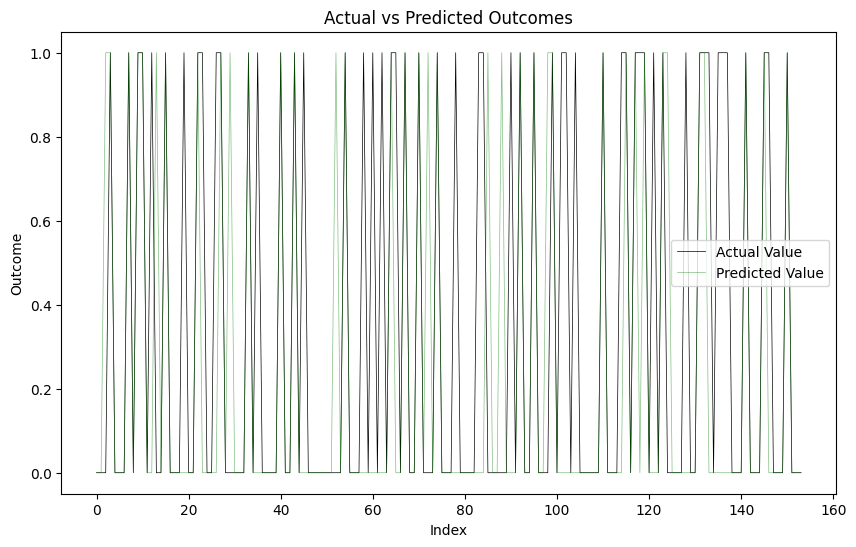

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separating data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Predictions
X_test_prediction = classifier.predict(X_test)

# Calculate accuracy
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data: ', test_data_accuracy)

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, color='black', lw=0.5, label='Actual Value')
plt.plot(range(len(X_test_prediction)), X_test_prediction, color='green', alpha=0.5, lw=0.5, label='Predicted Value')
plt.title('Actual vs Predicted Outcomes')
plt.xlabel('Index')
plt.ylabel('Outcome')
plt.legend()
plt.show()


Accuracy score of the test data:  0.7727272727272727


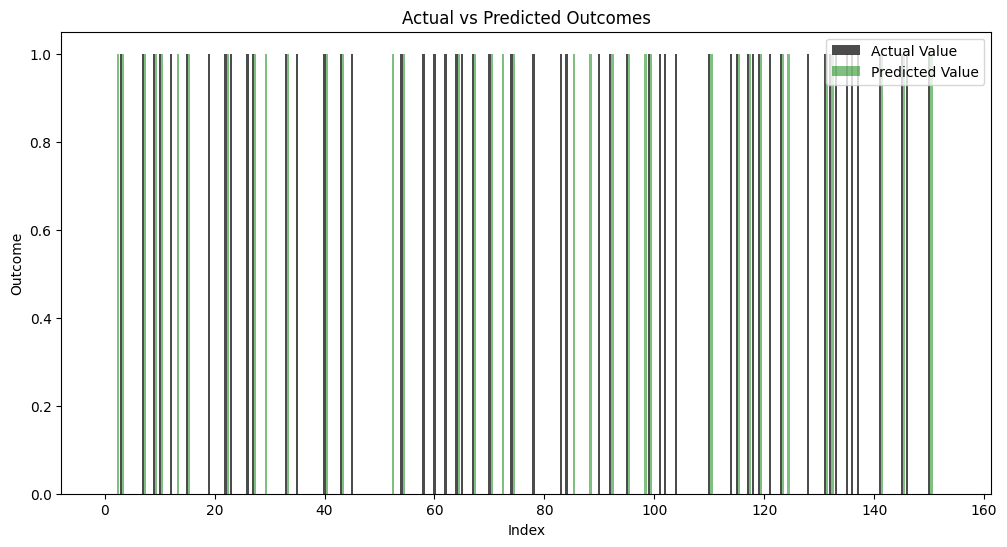

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Separating data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data standardization
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Predictions
X_test_prediction = classifier.predict(X_test)

# Calculate accuracy
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data: ', test_data_accuracy)

# Plotting Actual vs Predicted values in a bar graph
plt.figure(figsize=(12, 6))
width = 0.4  # width of the bars
indices = np.arange(len(Y_test))

# Plotting bars
plt.bar(indices, Y_test, width=width, label='Actual Value', color='black', alpha=0.7)
plt.bar(indices + width, X_test_prediction, width=width, label='Predicted Value', color='green', alpha=0.5)

plt.title('Actual vs Predicted Outcomes')
plt.xlabel('Index')
plt.ylabel('Outcome')
plt.legend()
plt.show()


Accuracy score of the training data:  0.7866449511400652
Accuracy score of the test data:  0.7727272727272727
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
Probabilities: [0.41509837 0.58490163]


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


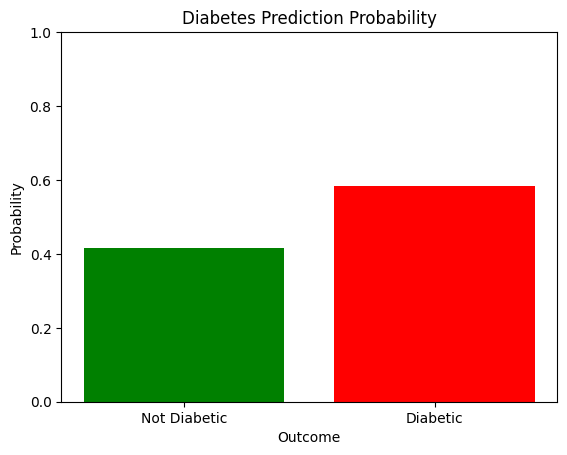

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
diabetes_dataset = pd.read_csv('diabetes.csv') 
diabetes_dataset.describe()

# Check the distribution of the outcome
diabetes_dataset['Outcome'].value_counts()
diabetes_dataset.groupby('Outcome').mean()

# Separating the features and the target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train the SVM classifier
classifier = svm.SVC(kernel='linear', probability=True)
classifier.fit(X_train, Y_train)

# Evaluate the model on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data: ', training_data_accuracy)

# Evaluate the model on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data: ', test_data_accuracy)

# Predicting for a new input
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

# Making the prediction
prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# Get the probability of each outcome
probabilities = classifier.predict_proba(std_data)[0]
print('Probabilities:', probabilities)

# Plotting the bar graph
outcome_labels = ['Not Diabetic', 'Diabetic']
colors = ['green', 'red']

plt.bar(outcome_labels, probabilities, color=colors)
plt.ylim(0, 1)
plt.title('Diabetes Prediction Probability')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()
